In [3]:
import pyqrlew as qrl
from pyqrlew.io import PostgreSQL

In [4]:
# Read data
db = PostgreSQL()
dataset = db.financial()

Error response from daemon: network with name qrlew-net already exists


/var/run/postgresql:5432 - accepting connections
/var/run/postgresql:5432 - accepting connections
/var/run/postgresql:5432 - accepting connections


In [5]:
dataset.relations()

[(['account'], <Relation at 0x10d3d6ed0>),
 (['card'], <Relation at 0x10d3d6c90>),
 (['client'], <Relation at 0x10d3d6fc0>),
 (['disp'], <Relation at 0x10d3d6cc0>),
 (['district'], <Relation at 0x10d3d6b40>),
 (['loan'], <Relation at 0x10d3d6e10>),
 (['order'], <Relation at 0x10d3d6d50>),
 (['trans'], <Relation at 0x10d3d6de0>)]

In [6]:
dataset.relations()[0][1].dot()

'digraph graph_agay {\n\n        rankdir="TB";\n        splines=true;\n        overlap=false;\n        nodesep="0.2";\n        ranksep="0.4";\n        labelloc="t";\n        fontname="Ovo,Red Hat Text";\n        fontsize="11pt"\n        bgcolor="#00000000"\n\n            node [ shape="box" style="filled,rounded" margin=0.2, fontname="Red Hat Display,sans-serif", fontsize="11pt", color="#00000055" ]\n            edge [ fontname="Red Hat Text" color="#2B303A" ]\n            \n    graph_agay[label=<<b>ACCOUNT size ∈ int{0}</b><br/>account_id = account_id ∈ int<br/>district_id = district_id ∈ int<br/>frequency = frequency ∈ str<br/>date = date ∈ datetime[0001-01-01 00:00:00 9999-12-31 00:00:00]>][fillcolor="#ff1744"][fontcolor="#ffffffbb"];\n}\n'

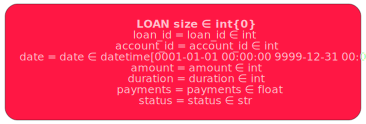

In [13]:
import graphviz
from IPython.display import display

for path, relation in dataset.relations():
    display(graphviz.Source(relation.dot()))

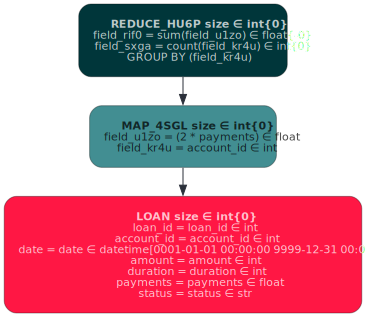

In [14]:
result = dataset.sql('select sum(2*payments), count(account_id) from loan group by account_id')

display(graphviz.Source(result.dot()))

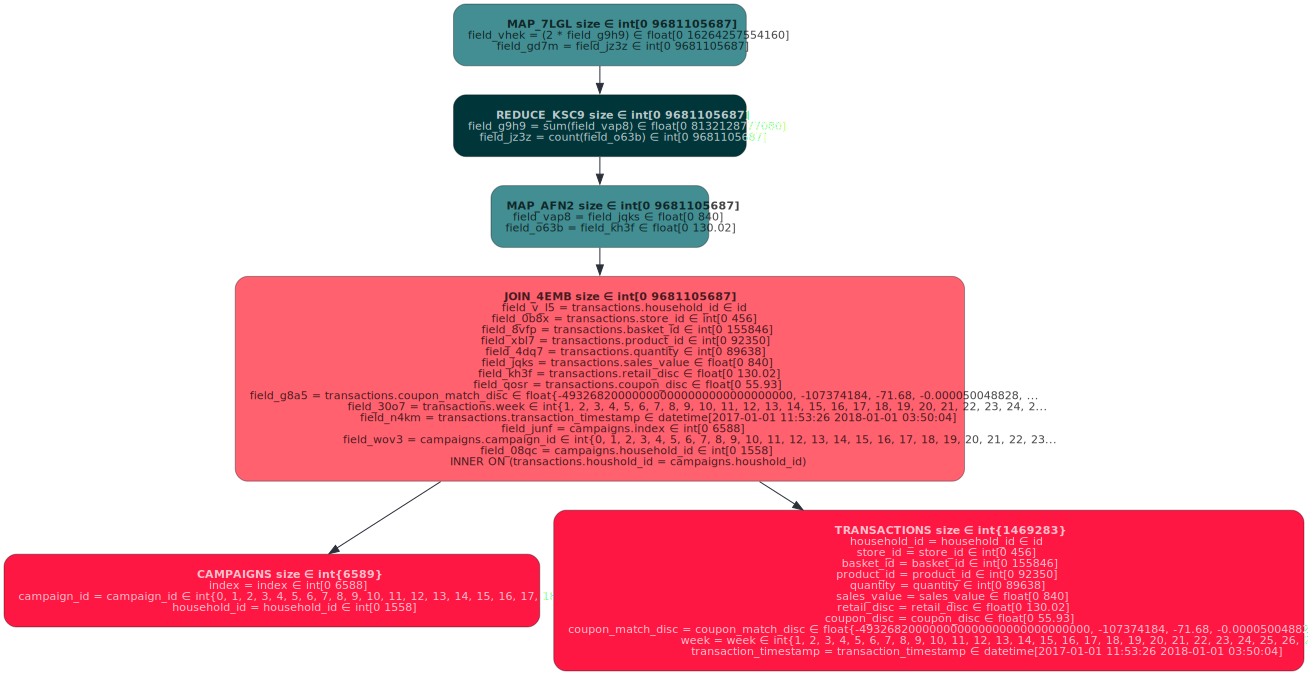

In [7]:
result = dataset.sql('select 2*sum(sales_value), count(retail_disc) from transactions join campaigns on transactions.houshold_id=campaigns.houshold_id')

display(graphviz.Source(result.dot()))